# Sarcasm Detection
 **Acknowledgement**

Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

## Install `Tensorflow2.0` 

In [ ]:
!!pip uninstall tensorflow
!pip install tensorflow==2.0.0

## Get Required Files from Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [4]:
#Set your project path 
import pandas as pd
project_path = "/content/drive/My Drive/Project/Sarcasm Detection-20200620T172350Z-001/Sarcasm Detection/Data/" ## Add your path here ##

#**## Reading and Exploring Data**

## Read Data "Sarcasm_Headlines_Dataset.json". Explore the data and get  some insights about the data. ( 4 marks)
Hint - As its in json format you need to use pandas.read_json function. Give paraemeter lines = True.

In [5]:
Sarcasmdf = pd.read_json(project_path + "Sarcasm_Headlines_Dataset.json",lines = True)
Sarcasmdf.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


## Drop `article_link` from dataset. ( 2 marks)
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [6]:
Sarcasmdf.drop(['article_link'], axis = 1,inplace = True)
Sarcasmdf.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


## Get the Length of each line and find the maximum length. ( 4 marks)
As different lines are of different length. We need to pad the our sequences using the max length.

In [7]:
max_length = max([len(i) for i in Sarcasmdf.headline])
max_length

254

#**## Modelling**

## Import required modules required for modelling.

In [9]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

# Set Different Parameters for the model. ( 2 marks)

In [8]:
max_features = 10000
maxlen = max_length ## Add your max length here ##
embedding_size = 100

## Apply Keras Tokenizer of headline column of your data.  ( 4 marks)
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [10]:
tokenizer = Tokenizer(num_words=max_features) 
tokenizer.fit_on_texts(Sarcasmdf.headline)

In [10]:
maxlen

254

# Define X and y for your model.

In [11]:
X = tokenizer.texts_to_sequences(Sarcasmdf['headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(Sarcasmdf['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 26709
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0  

## Get the Vocabulary size ( 2 marks)
Hint : You can use tokenizer.word_index.

In [12]:
tokenizer.word_index 

{'to': 1,
 'of': 2,
 'the': 3,
 'in': 4,
 'for': 5,
 'a': 6,
 'on': 7,
 'and': 8,
 'with': 9,
 'is': 10,
 'new': 11,
 'trump': 12,
 'man': 13,
 'from': 14,
 'at': 15,
 'about': 16,
 'you': 17,
 'this': 18,
 'by': 19,
 'after': 20,
 'up': 21,
 'out': 22,
 'be': 23,
 'how': 24,
 'as': 25,
 'it': 26,
 'that': 27,
 'not': 28,
 'are': 29,
 'your': 30,
 'his': 31,
 'what': 32,
 'he': 33,
 'all': 34,
 'just': 35,
 'who': 36,
 'has': 37,
 'will': 38,
 'more': 39,
 'one': 40,
 'into': 41,
 'report': 42,
 'year': 43,
 'why': 44,
 'have': 45,
 'area': 46,
 'over': 47,
 'donald': 48,
 'u': 49,
 'day': 50,
 'says': 51,
 's': 52,
 'can': 53,
 'first': 54,
 'woman': 55,
 'time': 56,
 'like': 57,
 'her': 58,
 "trump's": 59,
 'old': 60,
 'no': 61,
 'get': 62,
 'off': 63,
 'an': 64,
 'life': 65,
 'people': 66,
 'obama': 67,
 'now': 68,
 'house': 69,
 'still': 70,
 "'": 71,
 'women': 72,
 'make': 73,
 'was': 74,
 'than': 75,
 'white': 76,
 'back': 77,
 'my': 78,
 'i': 79,
 'clinton': 80,
 'down': 81,
 'i

In [11]:
len(tokenizer.word_index)

29656

#**## Word Embedding**

## Get Glove Word Embeddings

In [18]:
glove_file = project_path + "glove.6B.zip"

In [38]:
#Extract Glove embedding zip file
#from zipfile import ZipFile
#with ZipFile(glove_file, 'r') as z:
#  z.extractall()

# Get the Word Embeddings using Embedding file as given below.

In [29]:
##EMBEDDING_FILE = './glove.6B.100d.txt'
EMBEDDING_FILE = project_path + 'glove.6B.100d.txt'
embeddings = {}
for o in open(EMBEDDING_FILE,encoding = "utf8"):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd



# Create a weight matrix for words in training docs

In [30]:
num_words = max_features + 1
embedding_matrix = np.zeros((num_words, embedding_size))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None and i < (embedding_size):
        embedding_matrix[i] = embedding_vector
    #if i > (embedding_size + 1): print(i, word)

len(embeddings.values())

400000

## Create and Compile your Model  ( 7 marks)
Hint - Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


In [31]:
model = Sequential()
### Embedding layer for hint 
model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix],input_length= maxlen))
### Bidirectional LSTM layer for hint 
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(Dense(256,activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 254, 100)          1000100   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 254, 256)          234496    
_________________________________________________________________
dense_4 (Dense)              (None, 254, 256)          65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 254, 256)          0         
_________________________________________________________________
dense_5 (Dense)              (None, 254, 1)            257       
Total params: 1,300,645
Trainable params: 1,300,645
Non-trainable params: 0
_________________________________________________________________


# Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy ( 5 marks)


In [32]:
batchsize = 100
epoch = 5
hist = model.fit(X,y,validation_split = 0.2, batch_size=batchsize, epochs=epoch,workers = 5)
## Add your code here ##

Epoch 1/5
214/214 [==============================] - 31s 145ms/step - loss: 0.6786 - accuracy: 0.5643 - val_loss: 0.6586 - val_accuracy: 0.5850
Epoch 2/5
214/214 [==============================] - 30s 141ms/step - loss: 0.6807 - accuracy: 0.5714 - val_loss: 0.6729 - val_accuracy: 0.5788
Epoch 3/5
214/214 [==============================] - 30s 141ms/step - loss: 0.6422 - accuracy: 0.6044 - val_loss: 0.4795 - val_accuracy: 0.7868
Epoch 4/5
214/214 [==============================] - 30s 142ms/step - loss: 0.4098 - accuracy: 0.8196 - val_loss: 0.7368 - val_accuracy: 0.5811
Epoch 5/5
214/214 [==============================] - 30s 142ms/step - loss: 0.3978 - accuracy: 0.8403 - val_loss: 0.4768 - val_accuracy: 0.8355


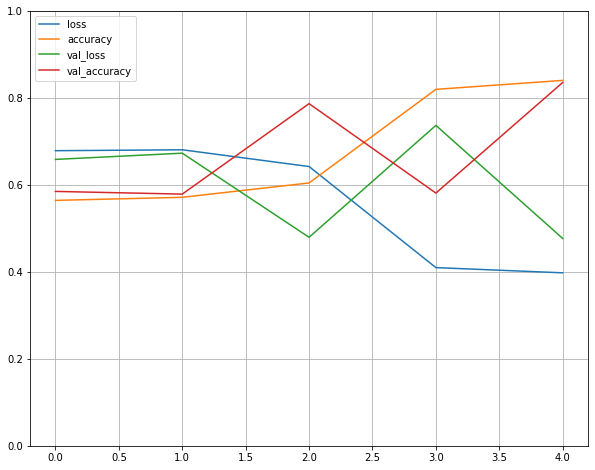

In [36]:
import matplotlib.pyplot as plt
pd.DataFrame(hist.history).plot(figsize = (10,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [37]:
print("Validation accuracy :",hist.history['val_accuracy'])

Validation accuracy : [0.5849545001983643, 0.5787563920021057, 0.7867943048477173, 0.5811442136764526, 0.8354843854904175]
